# Intelligent Systems
# Exercise 04 / Representation
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

# Exercise 04 - Task 3

Implement the PCA procedure with the help of numpy. Compare your results with the results of sklearn's PCA.

In [3]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

In [4]:
# helper method to plot 3D Data, nothing to do here

def make_3D_plot(dataFrame, x_label="sepal_len", y_label="sepal_wid", z_label="petal_len"): 
        
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10  
    
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        ax.plot(group[x_label],group[y_label], group[z_label], 'o', markersize=8, color=colors[key], alpha=0.5, label=key)

    plt.title('Iris Dataset')
    ax.legend(loc='upper right')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.show()

In [5]:
# helper method to plot 2D Data

def make_2D_plot(dataFrame):    
    
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    fig, ax = plt.subplots()
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=dataFrame.columns[0], y=dataFrame.columns[1], label=key, color=colors[key])
    plt.show()

## Import Iris Dataset 

You can use the following link to download the data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [8]:
# load data into dataframe
irisData = pd.read_csv('D:\WinterSemester-2019-20\IntelligentSystem\Exercise Sheets\Exercise_04\iris.data', header=None, sep=',')

In [17]:
print(irisData)
print(type(irisData))

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


## Plot Data to get an overview

     sepal_len  sepal_wid  petal_len  petal_wid           class
0          5.1        3.5        1.4        0.2     Iris-setosa
1          4.9        3.0        1.4        0.2     Iris-setosa
2          4.7        3.2        1.3        0.2     Iris-setosa
3          4.6        3.1        1.5        0.2     Iris-setosa
4          5.0        3.6        1.4        0.2     Iris-setosa
..         ...        ...        ...        ...             ...
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

[150 rows x 5 columns]


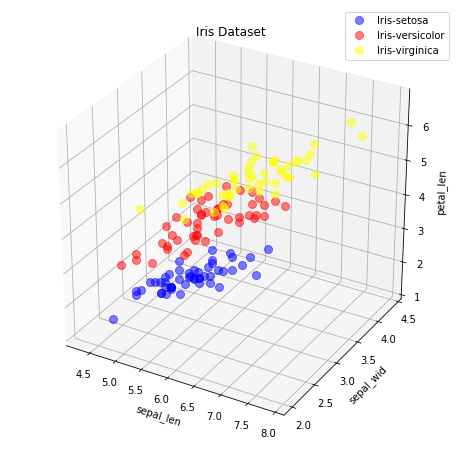

In [22]:
# vertical line plot very useful for feature analysis 
# def make_3D_plot(dataFrame, x_label="sepal_len", y_label="sepal_wid", z_label="petal_len"):

#irisData.columns = ['w', 'x', 'y', 'z', 'class']
irisData.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
print(irisData)
make_3D_plot(irisData)


---

## Step 1: Standardize Data 

In [63]:

#print(irisData)
#print(irisData.describe())
#print(irisData.mean())
#print(irisData.std())
#print(irisData['sepal_len'])
#print((irisData['sepal_len'] - irisData.mean()['sepal_len']) / irisData.std(ddof=0)['sepal_len'])

irisStandardizedRajib = irisData
for c in irisData.columns[:4]:
    irisStandardizedRajib[c] =  (irisData[c] - irisData.mean()[c]) / irisData.std(ddof=0)[c]

print(irisData)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
irisStardizeSklearn = irisData[irisData.columns[:4]]
#irisStardizeSklearn = irisData.iloc[:,:4]
scaler.fit(irisStardizeSklearn)
#print(irisStardizeSklearn)
#print(scaler.transform(irisStardizeSklearn))
irisStardizeSklearnDataFrame = pd.DataFrame(scaler.transform(irisStardizeSklearn), columns=irisData.columns[:4])
irisStardizeSklearnDataFrame['class'] = irisData['class']

irisStardizeSklearnDataFrame


     sepal_len  sepal_wid  petal_len  petal_wid           class
0    -0.900681   1.032057  -1.341272  -1.312977     Iris-setosa
1    -1.143017  -0.124958  -1.341272  -1.312977     Iris-setosa
2    -1.385353   0.337848  -1.398138  -1.312977     Iris-setosa
3    -1.506521   0.106445  -1.284407  -1.312977     Iris-setosa
4    -1.021849   1.263460  -1.341272  -1.312977     Iris-setosa
..         ...        ...        ...        ...             ...
145   1.038005  -0.124958   0.819624   1.447956  Iris-virginica
146   0.553333  -1.281972   0.705893   0.922064  Iris-virginica
147   0.795669  -0.124958   0.819624   1.053537  Iris-virginica
148   0.432165   0.800654   0.933356   1.447956  Iris-virginica
149   0.068662  -0.124958   0.762759   0.790591  Iris-virginica

[150 rows x 5 columns]


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [64]:
irisStandardizedData

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


## Step 2: Create Covariance Matrix

In [70]:
# calculate covariance matrix
print(irisStandardizedData)
coVarianceMatrix = irisStandardizedData.iloc[:,:4].cov()
coVarianceMatrix

     sepal_len  sepal_wid  petal_len  petal_wid           class
0    -0.900681   1.032057  -1.341272  -1.312977     Iris-setosa
1    -1.143017  -0.124958  -1.341272  -1.312977     Iris-setosa
2    -1.385353   0.337848  -1.398138  -1.312977     Iris-setosa
3    -1.506521   0.106445  -1.284407  -1.312977     Iris-setosa
4    -1.021849   1.263460  -1.341272  -1.312977     Iris-setosa
..         ...        ...        ...        ...             ...
145   1.038005  -0.124958   0.819624   1.447956  Iris-virginica
146   0.553333  -1.281972   0.705893   0.922064  Iris-virginica
147   0.795669  -0.124958   0.819624   1.053537  Iris-virginica
148   0.432165   0.800654   0.933356   1.447956  Iris-virginica
149   0.068662  -0.124958   0.762759   0.790591  Iris-virginica

[150 rows x 5 columns]


,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.006711,-0.110103,0.877605,0.823443
sepal_wid,-0.110103,1.006711,-0.423338,-0.358937
petal_len,0.877605,-0.423338,1.006711,0.969219
petal_wid,0.823443,-0.358937,0.969219,1.006711


## Step 3: Find Eigenvecotrs and Eigenvalues to the Matrix

In [74]:
# eigendecomposition of covariance matrix
from numpy import linalg as LA
eigenValues, eigenVectors = LA.eig(coVarianceMatrix)
print(eigenValues)
print(eigenVectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Plot Eigenvalue Distribution to find vectors with the highest variance

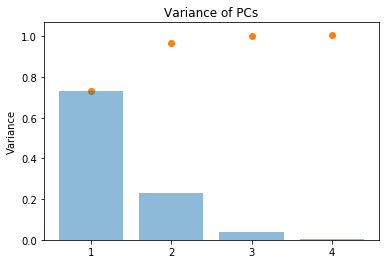

In [75]:
# nothing to do here, execute with eigenValues

objects = [1,2,3,4]
y_pos = [1,2,3,4]

# need eigenValues as numpy array
performance = eigenValues/4
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.scatter(x=[1,2,3,4], y=np.cumsum(eigenValues/4))
plt.ylabel('Variance')
plt.title('Variance of PCs')
 
plt.show()

## Step 4: Project Original Data onto new PC coordinates (new feature space)

In [76]:
pc_Matrix = eigenVectors[:,:2]
print(eigenVectors)
print("----------")
print(pc_Matrix)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
----------
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [77]:
irisValues = irisStandardizedData.iloc[:,:4].values
transformedData = irisValues.dot(pc_Matrix)
transformedData

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

### Plot new data and feature space

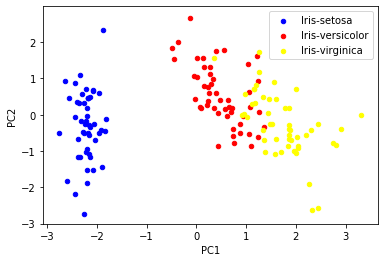

In [78]:
transformedFrame = pd.DataFrame(transformedData, columns=["PC1", "PC2"])
transformedFrame["class"] = irisData["class"]

make_2D_plot(transformedFrame)

---

## Step 0: Do it with sklearn :)

In [173]:
from sklearn.decomposition import PCA as sklearnPCA


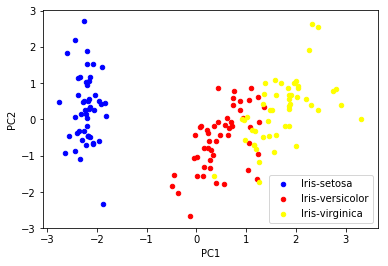

In [168]:
# plot and compare 